In [1]:
! pip install selenium

## 取得google 趨勢 csv

In [18]:
# -*- coding: utf-8 -*-
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import NoAlertPresentException
import unittest, time, re

driver = webdriver.Chrome()
driver.implicitly_wait(30)
base_url = "https://trends.google.com.tw/trends/explore?date=2012-05-06%202017-04-23&q=iphone"
verificationErrors = []
accept_next_alert = True

driver.get(base_url)
driver.find_element_by_css_selector(".widget-actions-menu").click()
driver.find_element_by_xpath("//button[3]").click()
driver.close()


In [19]:
import pandas
iphone = pandas.read_csv('data/multiTimeline.csv', header = 1, index_col=['週'], parse_dates=True)
iphone

,iphone: (全球)
週,
2012-05-06,34
2012-05-13,33
2012-05-20,33
2012-05-27,35
2012-06-03,35
2012-06-10,36
2012-06-17,36
2012-06-24,36
2012-07-01,35


In [20]:
import pandas_datareader
import requests
#?pandas_datareader.DataReader
import datetime
from datetime import timedelta
tw2330 = pandas_datareader.DataReader('2330.TW', data_source='yahoo',
                                 start=datetime.datetime(2012, 5, 6), 
                                 end=datetime.datetime(2017, 4, 23))
tw2330.index = tw2330.index.map(lambda e: e-timedelta(days=1))
tw2330

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-05-06,86.5,86.5,85.0,85.6,46464000,73.2421
2012-05-07,86.0,86.0,84.4,84.4,45605000,72.2153
2012-05-08,83.9,85.2,83.5,84.6,40753000,72.3864
2012-05-09,85.0,85.7,84.3,85.3,28381000,72.9854
2012-05-10,85.7,85.7,84.5,85.5,33565000,73.1565
2012-05-13,84.8,85.5,84.8,85.4,13924000,73.0709
2012-05-14,85.4,85.7,84.1,85.5,30654000,73.1565
2012-05-15,84.2,84.5,83.4,83.4,64877000,71.3597
2012-05-16,84.8,85.1,84.1,85.1,33612000,72.8142


In [21]:
results = tw2330.merge(iphone, left_index=True, right_index=True, how='inner')
data = results[['Close', 'iphone: (全球)']]
data

,Close,iphone: (全球)
2012-05-06,85.6,34
2012-05-13,85.4,33
2012-05-20,82.5,33
2012-05-27,81.6,35
2012-06-03,76.5,35
2012-06-10,80.4,36
2012-06-17,80.8,36
2012-06-24,79.6,36
2012-07-01,83.3,35
2012-07-08,80.0,36


Populating the interactive namespace from numpy and matplotlib


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a256dd8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11a50bd30>], dtype=object)

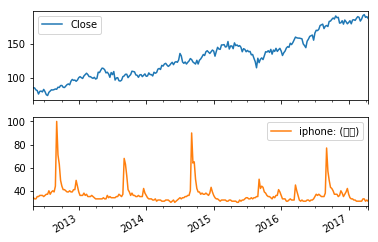

In [22]:
%pylab inline
data.plot(kind = 'line', subplots=True)

In [23]:

data.columns = ['Close', 'iphone']
data['iphone_mavg'] = pandas.rolling_mean(data.iphone, 3)

data.head()

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  app.launch_new_instance()
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Close,iphone,iphone_mavg
2012-05-06,85.6,34,NaN
2012-05-13,85.4,33,NaN
2012-05-20,82.5,33,33.333333
2012-05-27,81.6,35,33.666667
2012-06-03,76.5,35,34.333333


In [24]:
data['iphone_mavg'] = data.iphone_mavg.shift(1)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:

data['order'] = 0
# 黃金交叉做多
data['order'][data.iphone > data.iphone_mavg] = 1 
# 死亡交叉做空
data['order'][data.iphone < data.iphone_mavg] = -1

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.6/site-packages/pandas/core/generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
//anaconda/lib/python3.6/site-p

In [26]:
data.head()

,Close,iphone,iphone_mavg,order
2012-05-06,85.6,34,NaN,0
2012-05-13,85.4,33,NaN,0
2012-05-20,82.5,33,NaN,0
2012-05-27,81.6,35,33.333333,1
2012-06-03,76.5,35,33.666667,1


In [27]:
data['ret_tw2330'] = data.Close.pct_change()

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
data['ret_tw2330'] = data['ret_tw2330'].shift(-1)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
data['ret_google'] = data.order * data.ret_tw2330

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:

data.head()

,Close,iphone,iphone_mavg,order,ret_tw2330,ret_google
2012-05-06,85.6,34,NaN,0,-0.002336,-0.00000
2012-05-13,85.4,33,NaN,0,-0.033958,-0.00000
2012-05-20,82.5,33,NaN,0,-0.010909,-0.00000
2012-05-27,81.6,35,33.333333,1,-0.062500,-0.06250
2012-06-03,76.5,35,33.666667,1,0.050980,0.05098


In [31]:
data['prod_tw2330'] = (1 + data['ret_tw2330']).cumprod()
data['prod_google'] = (1 + data['ret_google']).cumprod()

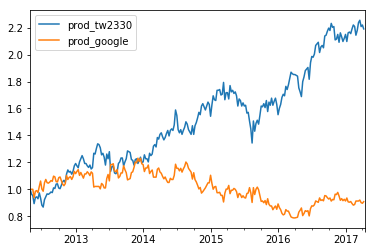

In [32]:
data[['prod_tw2330', 'prod_google']].plot(kind = 'line')